# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import time

# Convolution of Two Images

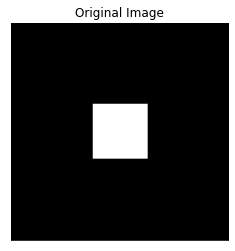

elapsed time is 98.748s


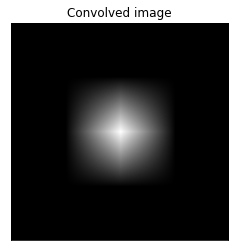

In [21]:
def create_image(size=(512, 128)):
    '''
    a function for create the image
    first parameter of size is the length of big(black) square
    second parameter of size is the length of little (white) square
    '''
    img = np.zeros((size[0], size[0]))
    img[(size[0]-size[1])//2:(size[0]+size[1])//2+1, (size[0]-size[1])//2:(size[0]+size[1])//2+1] = 255
    return img.copy()

def show_image(img, title=''):
    '''
    a function for showing the images
    '''
    plt.figure()
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.show()
    
img1 = create_image()
img2 = create_image()
show_image(img1, title='Original Image')

start = time.time()
conv_img = signal.convolve2d(img1, img2, mode='same')
end = time.time()
print('elapsed time is {:.3f}s'.format(end-start))
show_image(conv_img, title='Convolved image')

# Elapsed Time vs Size of Black Square

In [37]:
sizes = np.round(np.linspace(130, 512, 10)).astype('uint16')
times = []

for i in range(sizes.size):
    size = sizes[i]
    img1 = create_image((size, 128))
    img2 = create_image((size, 128))
    start = time.time()
    conv_img = signal.convolve2d(img1, img2, mode='same')
    end = time.time()
    times.append(end-start)
    
print(times)

[0.41054201126098633, 1.2735648155212402, 3.080839157104492, 6.288521766662598, 11.671595335006714, 19.83940315246582, 31.605105876922607, 47.70888137817383, 70.10220146179199, 98.85580348968506]


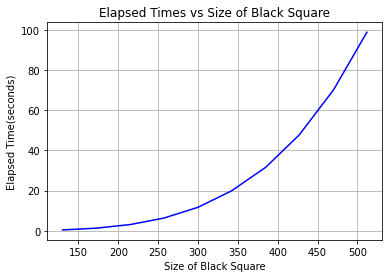

In [46]:
plt.figure()
plt.title('Elapsed Times vs Size of Black Square')
plt.xlabel('Size of Black Square')
plt.ylabel('Elapsed Time(seconds)')
plt.plot(sizes, times, color='blue')
plt.grid()
plt.show()

# A Function for Calculate Convolution

elapsed time is 0.026s


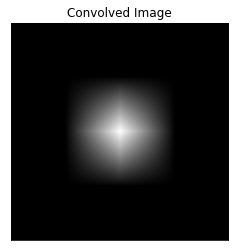

In [59]:
def conv(img1, img2):
    '''
    a function for calculating convolution of two images
    '''
    f1 = np.fft.fftshift(np.fft.fft2(img1))
    f2 = np.fft.fftshift(np.fft.fft2(img2))
    f = f1 * f2
    conv_img = np.fft.ifft2(np.fft.ifftshift(f))
    return conv_img

img1 = create_image()
img2 = create_image()

start = time.time()
conv_img = np.fft.fftshift(conv(img1, img2).real)
end = time.time()
print('elapsed time is {:.3f}s'.format(end-start))
show_image(conv_img, title='Convolved Image')